# The numpy.random package

## Problem Statement
Explain the use of the numpy.random package, with detailed explanations of at least five of the distributions provided for in the package. The four distinct tasks to be carried out are:

1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.


In [21]:
import numpy as np

#### [ref: Ian's "rand function" video] Lets explore what results can be generated by this np.random.rand function - change the number & values to make different arrays:

In [22]:
np.random.rand(4,4,2)

array([[[0.63190632, 0.18533393],
        [0.1451957 , 0.43651168],
        [0.90637784, 0.84931605],
        [0.23986233, 0.18284139]],

       [[0.53853395, 0.84453287],
        [0.60711399, 0.10684991],
        [0.99757962, 0.81978649],
        [0.57530368, 0.74267694]],

       [[0.05557241, 0.19437473],
        [0.32375566, 0.76429092],
        [0.25658383, 0.5387455 ],
        [0.43431161, 0.18014096]],

       [[0.80496477, 0.78397656],
        [0.84148531, 0.86821329],
        [0.90731117, 0.43598179],
        [0.35888049, 0.44454246]]])

#### note that this function creates a 'uniform distribtion over [0, 1), meaning values from 0 up to but not incl. 1. thats coded in the use of the square bracket and round bracket. (see: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand)


In [23]:
import matplotlib.pyplot as plt

#### to understand more about the distribution of random values generated by the np.random.rand function, lets use it generate a sample of values then plot them:

In [25]:
x = np.random.rand(10000)
x

array([0.62522956, 0.43743379, 0.02723614, ..., 0.97102331, 0.01912443,
       0.98488022])

(array([1030., 1005., 1052., 1006.,  986.,  984.,  991., 1022.,  944.,
         980.]),
 array([2.16968284e-05, 9.99792380e-02, 1.99936779e-01, 2.99894320e-01,
        3.99851862e-01, 4.99809403e-01, 5.99766944e-01, 6.99724485e-01,
        7.99682026e-01, 8.99639568e-01, 9.99597109e-01]),
 <a list of 10 Patch objects>)

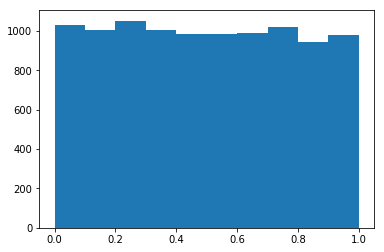

In [26]:
plt.hist(x)

#### nb: if the histogram doesn't appear, try adding 'plt.show()' to the above line. if that fails, try adding 'Xmatplotlib inline'

#### so - that's what a randomly generated uniform distribution looks like! uniform = every value in the range defined (eg: 0 to 0.9999*) has an equal chance of being picked.

In [8]:
s = np.random.uniform(-10,-9,10)
s

array([-9.20892405, -9.14107896, -9.59864099, -9.76580959, -9.08924469,
       -9.22148419, -9.29838844, -9.64663059, -9.98044271, -9.91508739])

#### so, trying out the np.random.uniform function, it seems that its very similar to the .rand function, in how it works

### ok. lets take a look at the 'numpy.random.normal' function. 

In [33]:
y = np.random.normal(0,0.1,1000)

(array([  2.,  22.,  60., 164., 235., 257., 165.,  68.,  24.,   3.]),
 array([-0.32437358, -0.25855666, -0.19273974, -0.12692282, -0.0611059 ,
         0.00471102,  0.07052794,  0.13634485,  0.20216177,  0.26797869,
         0.33379561]),
 <a list of 10 Patch objects>)

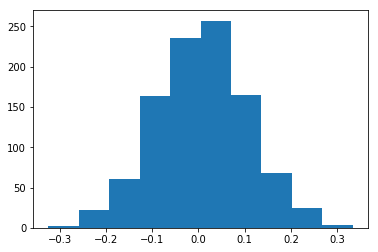

In [34]:
plt.hist(y)

so that looks more like a NORMAL distribution - where the chances of values close to zero being picked are greater than those at the extremities of the defined range.

NOTICE that its the 1st digit in np.random.normal (0,0.1,10000) which defines the MEAN in this distribution - in this case 0. You can make it any value you choose. Equally, the 2nd digit defines the intervals in the range.

### Now lets take a look at Random Number Generation, using numpy.random.RandomState

In [4]:
import numpy as np

In [12]:
z = np.random.RandomState([4])
z

## Bayes Theorem - a Simulation

In [2]:
import numpy as np
print(np.random.binomial(1,0.01))
# experiment runs once(1) with 1% prob of a positive result
# expect result will be zero 99 times out of 100

x = np.random.binomial(1, 0.01, 1000)
print(np.sum(x))
# now it runs 1,000 times,how often is the result positive?
# expect results to cluster around a mean of 10

0
14


### coding the simulation

In [3]:
# Helper function, returns True with probability P, False otherwise.\n",
def true_with_prob_p(p):
    return True if np.random.binomial(1, p) == 1 else False
    
    # Simulate the selection of a random person from the population.
    # Return True if they are a drug user, False otherwise.
    # True is returned with probability 0.005.
    
def select_random_person():
    return true_with_prob_p(0.005)\
    
    # Simulate the testing of a person from the population.
    # Return True if they test positive, False otherwise.
    # Non-users test positive with probability 0.01.
    # Users test positive with probability 0.99.
def test_person(user):
    if user:\
        return true_with_prob_p(0.99)
    else:
        return true_with_prob_p(0.01)
    
    # Run an experiment - take a random person from the population
    # and test whether or not they are positive.
def run_experiment():
    user = select_random_person()
    test = test_person(user)
    return (user, test)

In [4]:
# Run the experiment 10,000 times.
y = [run_experiment() for i in range(10000)]
# Count the number of users who tested positive.
user_and_positive = [True for i in y if i[0] == True and i[1] == True]

# Count the number of non-users who tested positive.
nonuser_and_positive = [True  for i in y if i[0] == False and i[1] == True]


In [15]:
np.sum(user_and_positive)

49

In [16]:
np.sum(nonuser_and_positive)

94

Text(0.5,1,'People who tested positive')

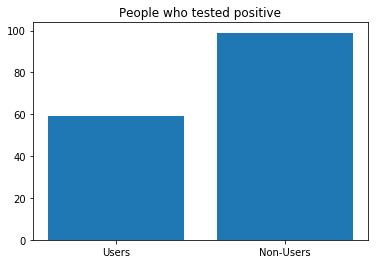

In [5]:
import matplotlib.pyplot as plt
plt.show()

plt.bar([0, 1], [np.sum(user_and_positive), np.sum(nonuser_and_positive)])
plt.xticks([0, 1], ('Users', ('Non-Users')))
plt.title("People who tested positive")

## Analysis
### P(User\Positive) = P(Positive\User) * P(user)
###                                       all  / P(Positive)
### also =  P(Positive\User) * P(user)
###     all  / P(Positive\User) * P(user) + P(Positive\NonUser) * P(NonUser)

In [1]:
# Probability that you're a user.
p_user = 0.005

# Probability that you're a non-user.
p_nonuser = 1 - p_user

# Probability that a user tests positive.
p_positive_user = 0.99

# Probability that a non-user tests negative.
p_positive_nonuser = 1.0 - 0.99

# Probability that you test positive.
p_positive = p_positive_user * p_user + p_positive_nonuser * p_nonuser

# Bayes' theorem.
top_line = p_positive_user * p_user
bottom_line = p_positive
p_user_positive = top_line / bottom_line

# Show result.
print(p_user_positive)

0.33221476510067094


## Exploring PANDAS

#### About the Iris data set from UC Irvine's machine learning repository
(https://archive.ics.uci.edu/ml/datasets/iris)

## Loading Data

In [2]:
import pandas as pd
# Load the iris data set from a URL.
df = pd.read_csv ("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# df means "data frame" - a data structure in Pandas, its a 2 dimensional array. In this case
# it has 4 columns of floating-point values, 1 column of 'strings'(ie. non numeric classes) and 1
# "index" column to reference each row.

### this imports a basic flat file (csv) with headers, then formats it nicely, as follows: 

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Pandas 'looks at' the values in the rows & column first, to figure out how best to format the table - eg. it detects floating-point values, strings etc. It also looks at the first row to see if it appears to be headers, rather than values. 

In the above table, it added row labels (1-149) and although they look like an ordered index, they are simply labels.

In this respect, Pandas is more sophisticated than numpy - which can only handle a dataframe of homogeneous types - eg. every cell is a floating-point value, or a string, etc. It cannot detect different data types.

## To make sub-selections from a dataframe in Pandas
#### columns and/or rows may have labels, or not. You can slice & name them with Pandas

## Selecting Rows and Columns

In [3]:
df[['petal_length', 'species']]

,petal_length,species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa
5,1.7,setosa
6,1.4,setosa
7,1.5,setosa
8,1.4,setosa
9,1.5,setosa


In [4]:
df[2:6]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


just told it "give me rows 2 up to, but not including, 6".

You can also combine both types of command in one call:

In [5]:
df[['petal_length', 'species']][2:6]

,petal_length,species
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa
5,1.7,setosa


# However !
### this notation approach is not recommended - can cause issues. The double [[ ]] is a clue that you're taking chances ....

### As safer approach to use loc and iloc

### loc uses labels, iloc uses position ....

In [6]:
df.loc[2:6]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


### it returned rows 2 to 6 because it looks at the labels - and those row numbers are labels, rather than values. If we had used iloc there, it would have excluded row 6. 
### Now - to get a column back:

In [7]:
df.loc[:, 'species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

### in that command, the colon meant "all" - so, all rows, and just the 'species' column. Now try this approach ....

In [8]:
df.loc[2:6, ['sepal_length', 'species']]

,sepal_length,species
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
5,5.4,setosa
6,4.6,setosa


### so "give me this list of column labels, and this list of row labels"
### note that the original row labels persist (eg. first one is '2') - be aware of this effect when using loc. Whereas ... iloc returns position:

In [9]:
df.iloc[2]

sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object

#### that returned the values from the row position 2 (remember, 0 is the first)

In [10]:
df.iloc[2:4,1]

2    3.2
3    3.1
Name: sepal_width, dtype: float64

### that returned the values from rows in position 2 to 4, and column position 1 (which is the 2nd column)

Now, the 'at' command can be used to return a sibgle value from an array:

In [11]:
df.at[3, 'species']

'setosa'

### ... *so, loc uses Labels, iloc uses Positions* !

## Boolean Selects:

In [3]:
df.loc[:, 'species'] == 'setosa'

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

###   == compared the value in "species" to the string "setosa" - if its setosa, then its TRUE.

Now, to return just the rows with the setosa string:

In [5]:
df.loc[df.loc[:, 'species'] == 'setosa']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [6]:
df.loc[df.loc[:, 'species'] == 'versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [7]:
x = df.loc[df.loc[:, 'species'] == 'versicolor']

In [8]:
x.loc[51]

sepal_length           6.4
sepal_width            3.2
petal_length           4.5
petal_width            1.5
species         versicolor
Name: 51, dtype: object

that returned the values in row *labeled* 51. Using iloc to get the same result requires you to specify the *position* of that row in the new dataframe, which is actually pos 1.

In [9]:
x.iloc[1]

sepal_length           6.4
sepal_width            3.2
petal_length           4.5
petal_width            1.5
species         versicolor
Name: 51, dtype: object